### Uppgift 1

In [1]:
print(list(range(10)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [10]:
import random as rnd

Ndice = int(1e6)
result = list(range(1,7))
Nresults = [0 for _ in range(6)]

for _ in range(Ndice):
    for i,die in enumerate(result):
        if rnd.randint(1,6) == die:
            Nresults[i] += 1
print(Nresults)

[167034, 166939, 167013, 167040, 166495, 166929]


In [15]:
import numpy as np

def volume_sphere(radius:float) -> float:
    if not isinstance(radius,(int,float)):
        raise TypeError(f"Radius must be float or int, not {type(radius)}")
    elif radius <= 0:
        raise ValueError("Radius can not be equal or smaller than zero")
    # Compute volume
    volume = 4/3 * np.pi * radius**3
    return volume

print(volume_sphere(2))


33.510321638291124


In [1]:
# Upg 4
with open('bamba.txt') as bambafile:
    bambalist = bambafile.readlines()
for line in bambalist:
    print(line)



v42

Chili sin carne

Pannkakor

Ärtsoppa

Kebab

Vegetarisk lasagne



In [17]:
# Upg 5

import numpy as np

def comp_distance(coord1,coord2):
    x1,y1 = coord1[0],coord1[1]
    x2,y2 = coord2[0],coord2[1]
    distance = np.sqrt((x1-x2)**2 + (y1-y2)**2)
    return distance


with open('testpunkter.txt', 'r') as testpunktfile:
    testpoint = testpunktfile.readlines()[1:]

print(testpoint)
testdata = []

for line in testpoint:
    line = line.replace("(","").replace(")","").replace("\n","").split(",")
    for i in range(0,len(line)-1,2):
        testdata.append([int(line[i]),int(line[i+1])])
print(testdata)


distances = []

for i in range(0,len(testdata),2):
    distances.append(comp_distance(testdata[i],testdata[i+1]))
print(distances)



['(1,2), (0,0)\n', '(2,0), (3,5)\n', '(-2,-2), (9,2)\n']
[[1, 2], [0, 0], [2, 0], [3, 5], [-2, -2], [9, 2]]
[2.23606797749979, 5.0990195135927845, 11.704699910719626]


In [17]:
# Upg 6

import random as rnd

# List of cards and their values
# Ace is woth 11 as long as point sum is lower than 21! TODO
cards  = ["A","2","3","4","5","6","7","8","9","10","J","Q","K"]
values = [ 11, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]
Ncards = len(cards)
# Counter used to check that we don't have more than 4 of each card
cardcounter = [0 for _ in range(Ncards)]

# Give cards
dealcards = [rnd.randint(0,Ncards-1),rnd.randint(0,Ncards-1)]
playcards = [rnd.randint(0,Ncards-1),rnd.randint(0,Ncards-1)]

# Save the number of each value
for n in dealcards:
    cardcounter[n] += 1
for n in playcards:
    cardcounter[n] += 1

# Save the value of each player's cards
dealvalue = values[dealcards[0]] + values[dealcards[1]]
playvalue = values[playcards[0]] + values[playcards[1]]

# Present cards (dealer shows 1...)
print(f"Dealer's farst card: {cards[dealcards[0]]}.")
print(f"Player cards: {cards[playcards[0]]} and {cards[playcards[1]]}. Value: {playvalue}")
print("")

# Ask player for continuation/card (need error checks)
response = input("Do you want a card? y/n: ")
while response == "y":
    print("Card is given")
    number = rnd.randint(0,Ncards-1)
    
    # Check number of cards per colour, max 4.
    cardcounter[number] += 1
    # If there's more than 4 of one, get a new card.
    while cardcounter[number] > 4:
        number = rnd.randint(0,Ncards-1)
        cardcounter[number] += 1

    # Add card and value to player's hand
    playcards.append(number)
    playvalue += values[number]

    # Print player's cards and value
    print("Player cards:")
    for card in playcards:
        print(cards[card])
    print(f"Player value: {playvalue}")

    # Check so that value doesn't exceed 21.
    if playvalue < 21:
        response = input("Do you want a card? y/n: ")
    else:
        print("Your points are 21 or more.")
        break

# Present final points

print(f"Player card value: {playvalue}")
print(f"Dealer cards: {cards[dealcards[0]]} and {cards[dealcards[1]]}. Value: {dealvalue}")

if playvalue <= 21:
    if playvalue > dealvalue:
        print("Player wins!")
    elif playvalue == 21:
        print("Player wins!")
    else:
        print("Dealer wins!")
else:
    print("Dealer wins!")




Dealer's farst card: K.
Player cards: 6 and 5. Value: 11

Card is given
Player cards:
6
5
9
Player value: 20
Player card value: 20
Dealer cards: K and K. Value: 20
Dealer wins!


Normal distribution with mu=0 and sigma=1
Normal distribution with mu=4 and sigma=3
Normal distribution with mu=4 and sigma=4


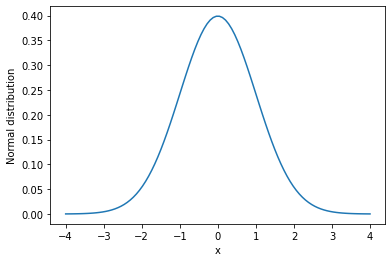

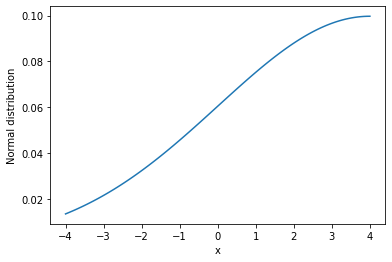

In [81]:
# upg 7

import numpy as np
import matplotlib.pyplot as plt

class NormalDist:
    def __init__(self, mu:float, sigma:float) -> None:
        self.mu = mu
        self.sigma = sigma

    # Getter    
    @property
    def mu(self) -> float:
        return self._mu
    @property
    def sigma(self) -> float:
        return self._sigma

    # Setter
    @mu.setter
    def mu(self, value: float) -> None:
        if self.validatetype(value):
            self._mu = value
    @sigma.setter
    def sigma(self, value: float) -> None:
        if self.validatetype(value):
            self._sigma = value

    # Error check
    @staticmethod
    def validatetype(value:float) -> bool:
        """Checks input type"""
        if not isinstance(value, (int,float)):
            raise TypeError(f"Value '{value}' must be a float or int, not {type(value)}")
        return True

    # --------------------------------------------

    # Compute normal distr
    def pdf(self, x:float) -> float:
        func_x = 1/(self._sigma*np.sqrt(2*np.pi)) * np.exp(-0.5 * ((x-self._mu)/self._sigma)**2)
        return func_x

    def plot_pdf(self, x:float) -> None:
        fig,ax = plt.figure(), plt.axes(xlabel="x", ylabel="Normal distribution")
        ax.plot(x,self.pdf(x))

    # Add two normal distributions
    def __add__(self,other) -> "NormalDist":
        newmu    = self._mu    + other._mu
        newsigma = self._sigma + other._sigma
        return NormalDist(newmu,newsigma)

    def __repr__(self) -> str:
        return f"Normal distribution with mu={self._mu} and sigma={self._sigma}"

# Tests

pdf1 = NormalDist(0,1)
pdf2 = NormalDist(4,3)
pdf3 = pdf1 + pdf2
print(pdf1)
print(pdf2)
print(pdf3)
#print(pdf1.pdf(x))
pdf1.plot_pdf(x)
pdf3.plot_pdf(x)



# Tests

In [15]:

def errorcheck(val):
    if val < 0 or val > 5:
        raise ValueError(f"Value must be 0 to 5, not {val}")
    else:
        print(True)


value = list(range(-3,7))
for val in value:
    try:
        errorcheck(val)
    except ValueError as err:
        print(err)






Value must be 0 to 5, not -3
Value must be 0 to 5, not -2
Value must be 0 to 5, not -1
True
True
True
True
True
True
Value must be 0 to 5, not 6


In [16]:
import numpy as np
import math

#x = list(range(1,4))
x = np.linspace(1,4,4)
print(x**2)
print(math.pow(x,2))


[ 1.  4.  9. 16.]


TypeError: only size-1 arrays can be converted to Python scalars